# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])    
    return model

In [9]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95


In [10]:
results_SGD = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
#先用 SGD
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("SGD Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results_SGD[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

SGD Experiment with LR = 0.100000


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast 

Epoch 35/50
50000/50000 [==============================] - 2s 43us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 36/50
50000/50000 [==============================] - 2s 43us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 37/50
50000/50000 [==============================] - 2s 43us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 38/50
50000/50000 [==============================] - 2s 45us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 39/50
50000/50000 [==============================] - 2s 47us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 40/50
50000/50000 [==============================] - 2s 43us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 41/50
50000/50000 [==============================] - 2s 43us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 42/50
50000/50

50000/50000 [==============================] - 2s 43us/step - loss: 0.5925 - acc: 0.7873 - val_loss: 1.7045 - val_acc: 0.5233
Epoch 37/50
50000/50000 [==============================] - 2s 45us/step - loss: 0.5766 - acc: 0.7941 - val_loss: 1.7308 - val_acc: 0.5309
Epoch 38/50
50000/50000 [==============================] - 2s 43us/step - loss: 0.5540 - acc: 0.8031 - val_loss: 1.8257 - val_acc: 0.5236
Epoch 39/50
50000/50000 [==============================] - 2s 43us/step - loss: 0.5319 - acc: 0.8082 - val_loss: 1.8191 - val_acc: 0.5242
Epoch 40/50
50000/50000 [==============================] - 2s 43us/step - loss: 0.5137 - acc: 0.8156 - val_loss: 1.8507 - val_acc: 0.5260
Epoch 41/50
50000/50000 [==============================] - 2s 43us/step - loss: 0.4893 - acc: 0.8239 - val_loss: 1.9246 - val_acc: 0.5242
Epoch 42/50
50000/50000 [==============================] - 2s 43us/step - loss: 0.4840 - acc: 0.8247 - val_loss: 1.9529 - val_acc: 0.5234
Epoch 43/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 43us/step - loss: 1.0236 - acc: 0.6387 - val_loss: 1.3592 - val_acc: 0.5246
Epoch 38/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.0057 - acc: 0.6483 - val_loss: 1.3594 - val_acc: 0.5296
Epoch 39/50
50000/50000 [==============================] - 2s 43us/step - loss: 0.9928 - acc: 0.6514 - val_loss: 1.4015 - val_acc: 0.5185
Epoch 40/50
50000/50000 [==============================] - 2s 43us/step - loss: 0.9828 - acc: 0.6568 - val_loss: 1.3297 - val_acc: 0.5339
Epoch 41/50
50000/50000 [==============================] - 2s 43us/step - loss: 0.9680 - acc: 0.6614 - val_loss: 1.4008 - val_acc: 0.5152
Epoch 42/50
50000/50000 [==============================] - 2s 43us/step - loss: 0.9567 - acc: 0.6645 - val_loss: 1.3749 - val_acc: 0.5266
Epoch 43/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.9449 - acc: 0.6667 - val_loss: 1.3327 - val_acc: 0.5370
Epoch 44/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 43us/step - loss: 1.6024 - acc: 0.4415 - val_loss: 1.6102 - val_acc: 0.4373
Epoch 39/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.5969 - acc: 0.4436 - val_loss: 1.6077 - val_acc: 0.4376
Epoch 40/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.5925 - acc: 0.4448 - val_loss: 1.6033 - val_acc: 0.4408
Epoch 41/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.5871 - acc: 0.4472 - val_loss: 1.5986 - val_acc: 0.4425
Epoch 42/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.5827 - acc: 0.4488 - val_loss: 1.5958 - val_acc: 0.4409
Epoch 43/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.5781 - acc: 0.4507 - val_loss: 1.5933 - val_acc: 0.4448
Epoch 44/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.5735 - acc: 0.4518 - val_loss: 1.5847 - val_acc: 0.4458
Epoch 45/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 46us/step - loss: 1.9481 - acc: 0.3142 - val_loss: 1.9468 - val_acc: 0.3145
Epoch 40/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.9444 - acc: 0.3159 - val_loss: 1.9434 - val_acc: 0.3159
Epoch 41/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.9410 - acc: 0.3166 - val_loss: 1.9401 - val_acc: 0.3182
Epoch 42/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.9376 - acc: 0.3189 - val_loss: 1.9367 - val_acc: 0.3183
Epoch 43/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.9344 - acc: 0.3198 - val_loss: 1.9335 - val_acc: 0.3197
Epoch 44/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.9311 - acc: 0.3210 - val_loss: 1.9304 - val_acc: 0.3214
Epoch 45/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.9280 - acc: 0.3234 - val_loss: 1.9274 - val_acc: 0.3219
Epoch 46/50
50000/50000 [=====================

In [11]:
#再用 RMSprop
results_RMSprop = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("RMSprop Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.RMSprop(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results_RMSprop[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

RMSprop Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 54us/step - loss: 14.4469 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 2s 45us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 2s 45us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 2s 45us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 2s 45us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 2s 45us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 2s 45us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.

50000/50000 [==============================] - 2s 50us/step - loss: 2.3255 - acc: 0.2130 - val_loss: 2.0854 - val_acc: 0.2425
Epoch 2/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.8876 - acc: 0.3173 - val_loss: 2.0062 - val_acc: 0.2969
Epoch 3/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.7811 - acc: 0.3619 - val_loss: 1.8322 - val_acc: 0.3463
Epoch 4/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.7127 - acc: 0.3842 - val_loss: 1.9742 - val_acc: 0.3086
Epoch 5/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.6501 - acc: 0.4099 - val_loss: 1.7726 - val_acc: 0.3846
Epoch 6/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.6043 - acc: 0.4270 - val_loss: 1.5915 - val_acc: 0.4313
Epoch 7/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.5687 - acc: 0.4406 - val_loss: 1.5695 - val_acc: 0.4392
Epoch 8/50
50000/50000 [============================

50000/50000 [==============================] - 2s 45us/step - loss: 1.7878 - acc: 0.3644 - val_loss: 1.7578 - val_acc: 0.3705
Epoch 3/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.7087 - acc: 0.3947 - val_loss: 1.7036 - val_acc: 0.3933
Epoch 4/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.6526 - acc: 0.4132 - val_loss: 1.6503 - val_acc: 0.4023
Epoch 5/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.6094 - acc: 0.4299 - val_loss: 1.6598 - val_acc: 0.4050
Epoch 6/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.5735 - acc: 0.4426 - val_loss: 1.6027 - val_acc: 0.4218
Epoch 7/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.5418 - acc: 0.4551 - val_loss: 1.6415 - val_acc: 0.4112
Epoch 8/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.5142 - acc: 0.4657 - val_loss: 1.6365 - val_acc: 0.4166
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 2s 45us/step - loss: 1.8794 - acc: 0.3485 - val_loss: 1.8506 - val_acc: 0.3593
Epoch 4/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.8306 - acc: 0.3630 - val_loss: 1.8146 - val_acc: 0.3759
Epoch 5/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.7955 - acc: 0.3767 - val_loss: 1.7802 - val_acc: 0.3794
Epoch 6/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.7680 - acc: 0.3864 - val_loss: 1.7687 - val_acc: 0.3819
Epoch 7/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.7445 - acc: 0.3936 - val_loss: 1.7426 - val_acc: 0.3898
Epoch 8/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.7245 - acc: 0.4013 - val_loss: 1.7195 - val_acc: 0.4049
Epoch 9/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.7059 - acc: 0.4078 - val_loss: 1.7189 - val_acc: 0.4034
Epoch 10/50
50000/50000 [===========================

In [12]:
# 三用 Adagrad
results_Adagrad = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Adagrad Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adagrad(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results_Adagrad[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Adagrad Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===

50000/50000 [==============================] - 3s 51us/step - loss: 10.3364 - acc: 0.1251 - val_loss: 2.1855 - val_acc: 0.2115
Epoch 2/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.9342 - acc: 0.2970 - val_loss: 1.8535 - val_acc: 0.3163
Epoch 3/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.7874 - acc: 0.3565 - val_loss: 1.8431 - val_acc: 0.3260
Epoch 4/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.7059 - acc: 0.3872 - val_loss: 1.7144 - val_acc: 0.3817
Epoch 5/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.6524 - acc: 0.4078 - val_loss: 1.8522 - val_acc: 0.3422
Epoch 6/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.6054 - acc: 0.4269 - val_loss: 1.6087 - val_acc: 0.4294
Epoch 7/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.5678 - acc: 0.4410 - val_loss: 1.5687 - val_acc: 0.4411
Epoch 8/50
50000/50000 [===========================

50000/50000 [==============================] - 2s 46us/step - loss: 1.8053 - acc: 0.3616 - val_loss: 1.7745 - val_acc: 0.3703
Epoch 3/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.7357 - acc: 0.3903 - val_loss: 1.7211 - val_acc: 0.3931
Epoch 4/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.6870 - acc: 0.4093 - val_loss: 1.7213 - val_acc: 0.3843
Epoch 5/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.6527 - acc: 0.4214 - val_loss: 1.7206 - val_acc: 0.3765
Epoch 6/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.6239 - acc: 0.4307 - val_loss: 1.6544 - val_acc: 0.4159
Epoch 7/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.5990 - acc: 0.4403 - val_loss: 1.6100 - val_acc: 0.4303
Epoch 8/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.5795 - acc: 0.4466 - val_loss: 1.6199 - val_acc: 0.4307
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 2s 44us/step - loss: 1.8915 - acc: 0.3440 - val_loss: 1.8744 - val_acc: 0.3499
Epoch 4/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.8575 - acc: 0.3546 - val_loss: 1.8476 - val_acc: 0.3613
Epoch 5/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.8344 - acc: 0.3619 - val_loss: 1.8283 - val_acc: 0.3661
Epoch 6/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.8173 - acc: 0.3680 - val_loss: 1.8139 - val_acc: 0.3691
Epoch 7/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.8034 - acc: 0.3729 - val_loss: 1.8011 - val_acc: 0.3715
Epoch 8/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.7921 - acc: 0.3771 - val_loss: 1.7920 - val_acc: 0.3752
Epoch 9/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.7824 - acc: 0.3819 - val_loss: 1.7831 - val_acc: 0.3789
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 2s 44us/step - loss: 2.1627 - acc: 0.2320 - val_loss: 2.1543 - val_acc: 0.2384
Epoch 5/50
50000/50000 [==============================] - 2s 44us/step - loss: 2.1462 - acc: 0.2404 - val_loss: 2.1396 - val_acc: 0.2432
Epoch 6/50
50000/50000 [==============================] - 2s 44us/step - loss: 2.1329 - acc: 0.2462 - val_loss: 2.1278 - val_acc: 0.2494
Epoch 7/50
50000/50000 [==============================] - 2s 44us/step - loss: 2.1219 - acc: 0.2501 - val_loss: 2.1178 - val_acc: 0.2520
Epoch 8/50
50000/50000 [==============================] - 2s 44us/step - loss: 2.1126 - acc: 0.2540 - val_loss: 2.1092 - val_acc: 0.2542
Epoch 9/50
50000/50000 [==============================] - 2s 44us/step - loss: 2.1043 - acc: 0.2568 - val_loss: 2.1015 - val_acc: 0.2571
Epoch 10/50
50000/50000 [==============================] - 2s 44us/step - loss: 2.0969 - acc: 0.2590 - val_loss: 2.0946 - val_acc: 0.2605
Epoch 11/50
50000/50000 [==========================

In [13]:
# 四用 Adam
results_Adam = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Adagrad Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results_Adam[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Adagrad Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 53us/step - loss: 14.4500 - acc: 0.0997 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 2s 47us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 2s 47us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 2s 47us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 2s 47us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 2s 47us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 2s 47us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.

50000/50000 [==============================] - 3s 58us/step - loss: 1.9188 - acc: 0.3077 - val_loss: 1.7346 - val_acc: 0.3788
Epoch 2/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.7003 - acc: 0.3909 - val_loss: 1.6821 - val_acc: 0.4063
Epoch 3/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.6136 - acc: 0.4236 - val_loss: 1.6000 - val_acc: 0.4314
Epoch 4/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.5552 - acc: 0.4459 - val_loss: 1.5532 - val_acc: 0.4451
Epoch 5/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.5040 - acc: 0.4637 - val_loss: 1.5504 - val_acc: 0.4467
Epoch 6/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.4718 - acc: 0.4726 - val_loss: 1.5125 - val_acc: 0.4639
Epoch 7/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.4402 - acc: 0.4870 - val_loss: 1.5105 - val_acc: 0.4624
Epoch 8/50
50000/50000 [============================

50000/50000 [==============================] - 2s 47us/step - loss: 1.7166 - acc: 0.3927 - val_loss: 1.6740 - val_acc: 0.4083
Epoch 3/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.6312 - acc: 0.4266 - val_loss: 1.6096 - val_acc: 0.4330
Epoch 4/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.5756 - acc: 0.4447 - val_loss: 1.5842 - val_acc: 0.4358
Epoch 5/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.5310 - acc: 0.4612 - val_loss: 1.5269 - val_acc: 0.4626
Epoch 6/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.4949 - acc: 0.4760 - val_loss: 1.5226 - val_acc: 0.4576
Epoch 7/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.4627 - acc: 0.4843 - val_loss: 1.4927 - val_acc: 0.4711
Epoch 8/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.4352 - acc: 0.4949 - val_loss: 1.4694 - val_acc: 0.4788
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 2s 47us/step - loss: 1.8552 - acc: 0.3570 - val_loss: 1.8347 - val_acc: 0.3642
Epoch 4/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.8071 - acc: 0.3740 - val_loss: 1.7925 - val_acc: 0.3794
Epoch 5/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.7712 - acc: 0.3851 - val_loss: 1.7605 - val_acc: 0.3827
Epoch 6/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.7428 - acc: 0.3951 - val_loss: 1.7327 - val_acc: 0.3942
Epoch 7/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.7183 - acc: 0.4031 - val_loss: 1.7118 - val_acc: 0.4009
Epoch 8/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.6963 - acc: 0.4122 - val_loss: 1.6911 - val_acc: 0.4118
Epoch 9/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.6758 - acc: 0.4213 - val_loss: 1.6757 - val_acc: 0.4155
Epoch 10/50
50000/50000 [===========================

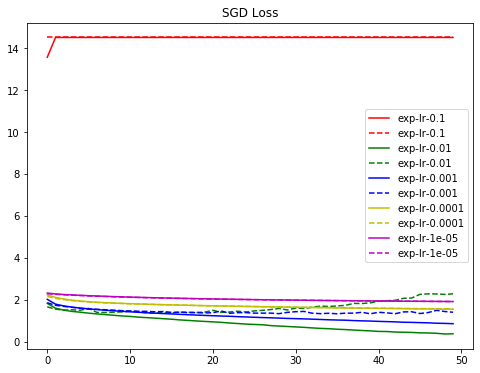

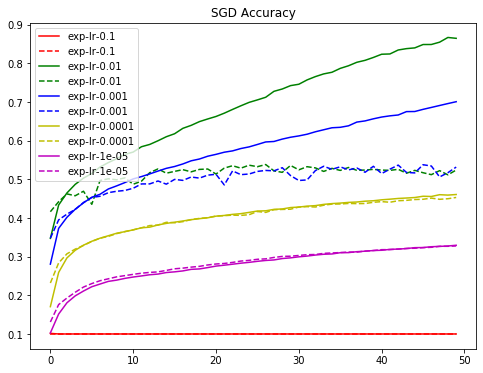

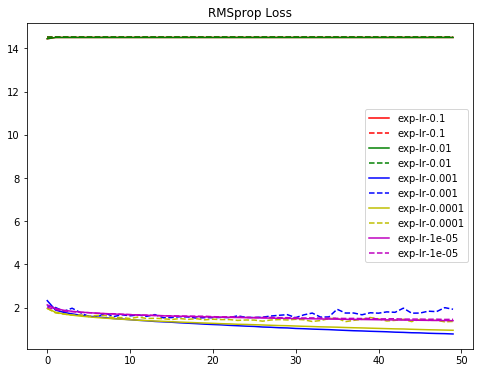

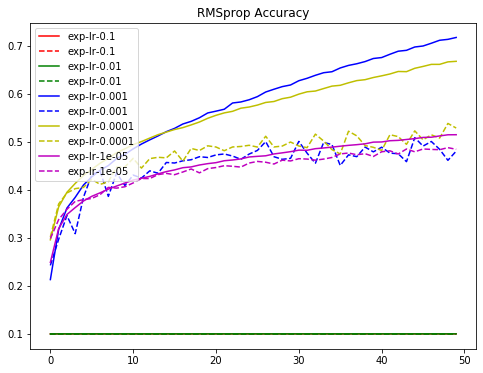

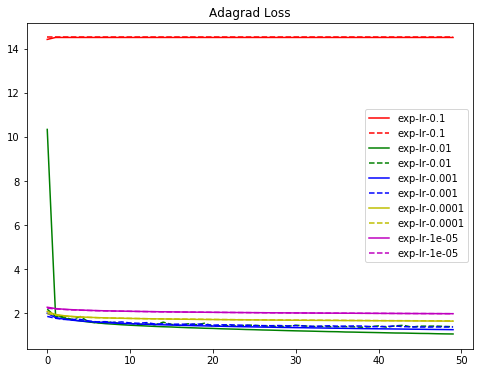

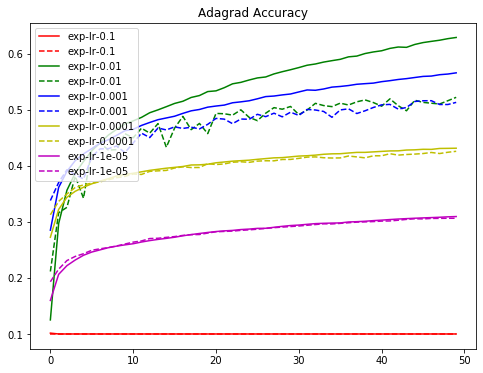

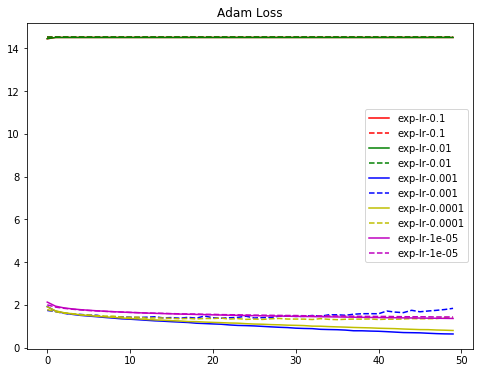

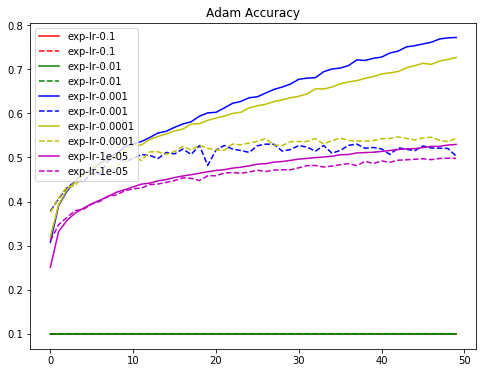

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_SGD.keys()):
    plt.plot(range(len(results_SGD[cond]['train-loss'])),results_SGD[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_SGD[cond]['valid-loss'])),results_SGD[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("SGD Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_SGD.keys()):
    plt.plot(range(len(results_SGD[cond]['train-acc'])),results_SGD[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_SGD[cond]['valid-acc'])),results_SGD[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("SGD Accuracy")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_RMSprop.keys()):
    plt.plot(range(len(results_RMSprop[cond]['train-loss'])),results_RMSprop[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_RMSprop[cond]['valid-loss'])),results_RMSprop[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("RMSprop Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_RMSprop.keys()):
    plt.plot(range(len(results_RMSprop[cond]['train-acc'])),results_RMSprop[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_RMSprop[cond]['valid-acc'])),results_RMSprop[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("RMSprop Accuracy")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_Adagrad.keys()):
    plt.plot(range(len(results_Adagrad[cond]['train-loss'])),results_Adagrad[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_Adagrad[cond]['valid-loss'])),results_Adagrad[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Adagrad Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_Adagrad.keys()):
    plt.plot(range(len(results_Adagrad[cond]['train-acc'])),results_Adagrad[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_Adagrad[cond]['valid-acc'])),results_Adagrad[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Adagrad Accuracy")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_Adam.keys()):
    plt.plot(range(len(results_Adam[cond]['train-loss'])),results_Adam[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_Adam[cond]['valid-loss'])),results_Adam[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Adam Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results_Adam.keys()):
    plt.plot(range(len(results_Adam[cond]['train-acc'])),results_Adam[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_Adam[cond]['valid-acc'])),results_Adam[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Adam Accuracy")
plt.legend()
plt.show()